In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# dataframe for demand log
df_demand_log = pd.read_excel('FruitSoul Demand Log Fixed.xlsx')
df_demand_log['Earliest Delivery Date'] = df_demand_log['Earliest Delivery Date'].dt.date
df_demand_log['Preferred Delivery Date'] = df_demand_log['Preferred Delivery Date'].dt.date
df_demand_log['Latest Delivery Date'] = df_demand_log['Latest Delivery Date'].dt.date

df_demand_log['Earliest Delivery Date'] = pd.to_datetime(df_demand_log['Earliest Delivery Date'])
df_demand_log['Preferred Delivery Date'] = pd.to_datetime(df_demand_log['Preferred Delivery Date'])
df_demand_log['Latest Delivery Date'] = pd.to_datetime(df_demand_log['Latest Delivery Date'])
df_demand_log['Demand Request Date'] = pd.to_datetime(df_demand_log['Demand Request Date'])
df_demand_log

,DemandID,Demand Request Date,Mix,Jar Size (vol. ounces),State,Quantity,Earliest Delivery Date,Preferred Delivery Date,Latest Delivery Date
0,1,2021-01-01,Apple-Mango,8,Maryland,1,2021-01-01,2021-01-04,2021-01-07
1,2,2021-01-01,Blueberry-Lemon,32,Kentucky,1,2021-01-04,2021-01-06,2021-01-09
2,3,2021-01-01,Orange-Passionfruit,16,Minnesota,1,2021-01-07,2021-01-10,2021-01-11
3,4,2021-01-01,Orange-Passionfruit,16,California,1,2021-01-07,2021-01-11,2021-01-14
4,5,2021-01-01,Orange-Passionfruit,32,Louisiana,1,2021-01-01,2021-01-04,2021-01-10
...,...,...,...,...,...,...,...,...,...
835374,835375,2023-12-31,Orange-Passionfruit,32,Arizona,1,2023-12-31,2024-01-05,2024-01-13
835375,835376,2023-12-31,Peach-Raspberry,32,California,1,2023-12-31,2024-01-01,2024-01-01
835376,835377,2023-12-31,Blueberry-Lemon,16,Arizona,1,2023-12-31,2024-01-02,2024-01-02
835377,835378,2023-12-31,Strawberry-Kiwi,8,California,1,2023-12-31,2024-01-03,2024-01-03


This code is just to understand the range from order to delivery date. It is useful for the analysis further on.

In [3]:
# Calculate the difference in days between 'Demand Request Date' and 'Earliest Delivery Date'
df_demand_log['Days Between Request and Earliest Delivery'] = (df_demand_log['Earliest Delivery Date'] - df_demand_log['Demand Request Date']).dt.days

# Calculate the difference in days between 'Demand Request Date' and 'Preferred Delivery Date'
df_demand_log['Days Between Request and Preferred Delivery'] = (df_demand_log['Preferred Delivery Date'] - df_demand_log['Demand Request Date']).dt.days

# Calculate the difference in days between 'Demand Request Date' and 'Latest Delivery Date'
df_demand_log['Days Between Request and Latest Delivery'] = (df_demand_log['Latest Delivery Date'] - df_demand_log['Demand Request Date']).dt.days

#Calculate the proportion of each difference
proportion_earliest = df_demand_log['Days Between Request and Earliest Delivery'].value_counts(normalize=True).sort_index()
proportion_preferred = df_demand_log['Days Between Request and Preferred Delivery'].value_counts(normalize=True).sort_index()
proportion_latest = df_demand_log['Days Between Request and Latest Delivery'].value_counts(normalize=True).sort_index()

# Combine all proportions into a single DataFrame
proportions_df = pd.DataFrame({
    'Days Between Request and Earliest Delivery': proportion_earliest,
    'Days Between Request and Preferred Delivery': proportion_preferred,
    'Days Between Request and Latest Delivery': proportion_latest
}).fillna(0)

# Drop the newly added columns from df_demand_log
df_demand_log.drop(columns=['Days Between Request and Earliest Delivery', 'Days Between Request and Preferred Delivery', 'Days Between Request and Latest Delivery'], inplace=True)

# Display the combined proportions DataFrame
proportions_df

,Days Between Request and Earliest Delivery,Days Between Request and Preferred Delivery,Days Between Request and Latest Delivery
0,0.499462,0.072526,0.028524
1,0.130323,0.084685,0.037752
2,0.117265,0.121473,0.058942
3,0.094354,0.143936,0.076887
4,0.067427,0.142963,0.087239
5,0.043508,0.124575,0.090998
6,0.024935,0.099712,0.089037
7,0.012913,0.074344,0.084486
8,0.006015,0.052873,0.077983
9,0.002400,0.035063,0.069440


In [4]:
df_delivery_costs_and_times = pd.read_excel('FruitSoul Expected Delivery Costs and Times.xlsx')
df_delivery_costs_and_times

,Destination State,Approximate distance from Stone Mountain (miles),Expected Delivery Cost From Stone Mountain (USD/ounce),Expected Delivery Time From Stone Mountain (days)
0,Alabama,150,0.9200,1
1,Alaska,3410,2.7750,5
2,Arizona,1840,2.7750,5
3,Arkansas,450,1.0950,3
4,California,2170,2.7750,5
5,Colorado,1210,1.7625,5
6,Connecticut,870,1.4075,5
7,Delaware,690,1.4075,5
8,Florida,440,1.0950,3
9,Georgia,0,0.9100,1


Add acceptable shipping date columns. Make sure they do not land on holidays or Sundays.

In [5]:
# Add shipping date columns
# Merge df_demand_log with df_delivery_costs_and_times to get the delivery times for each state
df_merged = df_demand_log.merge(df_delivery_costs_and_times, left_on='State', right_on='Destination State')

# Calculate the new shipping dates
df_merged['Earliest Acceptable Shipping Date'] = df_merged['Earliest Delivery Date'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
df_merged['Preferred Shipping Date'] = df_merged['Preferred Delivery Date'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
df_merged['Latest Acceptable Shipping Date'] = df_merged['Latest Delivery Date'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')

# If the shipping date columns are not already datetime, also ensure they are converted
df_merged['Earliest Acceptable Shipping Date'] = pd.to_datetime(df_merged['Earliest Acceptable Shipping Date'])
df_merged['Preferred Shipping Date'] = pd.to_datetime(df_merged['Preferred Shipping Date'])
df_merged['Latest Acceptable Shipping Date'] = pd.to_datetime(df_merged['Latest Acceptable Shipping Date'])

# Holidays on Monday
monday_holidays = ['2022-07-04', '2021-09-06', '2022-09-05', '2023-09-04']

# Holidays not on Sundays
non_sunday_holidays = ['2023-07-04']

# Function to adjust dates
def adjust_date(date, type='e'):
    """
    Adjust the date based on the type:
    'e' for Earliest Acceptable Shipping Date,
    'p' for Preferred Shipping Date (if this surpasses latest shipping date, just use latest acceptable shipping date),
    'l' for Latest Acceptable Shipping Date
    """
    if type == 'e' or type == 'p':
        if date.weekday() == 6:
            date = date + pd.Timedelta(days=1)
        if date.strftime('%Y-%m-%d') in monday_holidays or date.strftime('%Y-%m-%d') in non_sunday_holidays:
            date = date + pd.Timedelta(days=1)
        return date
    
    if type == 'l':
        if date.strftime('%Y-%m-%d') in monday_holidays or date.strftime('%Y-%m-%d') in non_sunday_holidays:
            date = date - pd.Timedelta(days=1)
        if date.weekday() == 6:
            date = date - pd.Timedelta(days=1)
        return date
        
    return date

# Adjust the dates
df_merged['Earliest Acceptable Shipping Date'] = df_merged['Earliest Acceptable Shipping Date'].apply(lambda x: adjust_date(x, 'e'))
df_merged['Preferred Shipping Date'] = df_merged['Preferred Shipping Date'].apply(lambda x: adjust_date(x, 'p'))
df_merged['Latest Acceptable Shipping Date'] = df_merged['Latest Acceptable Shipping Date'].apply(lambda x: adjust_date(x, 'l'))

This code double checks all holidays have been avoided.

In [6]:
# Dates for Labor Days
labor_days = ['2021-09-06', '2022-09-05', '2023-09-04']

# Filter the dataframe for entries where any of the shipping dates fall on Labor Days
labor_day_orders = df_merged[
    (df_merged['Earliest Acceptable Shipping Date'].dt.strftime('%Y-%m-%d').isin(labor_days)) |
    (df_merged['Preferred Shipping Date'].dt.strftime('%Y-%m-%d').isin(labor_days)) |
    (df_merged['Latest Acceptable Shipping Date'].dt.strftime('%Y-%m-%d').isin(labor_days))
]

# Display the count of such entries
labor_day_orders_count = labor_day_orders.shape[0]
print(f"Number of orders with shipping dates on Labor Days: {labor_day_orders_count}")

# Filter the dataframe for entries where any of the shipping dates fall on a Sunday
sunday_orders = df_merged[
    (df_merged['Earliest Acceptable Shipping Date'].dt.weekday == 6) |
    (df_merged['Preferred Shipping Date'].dt.weekday == 6) |
    (df_merged['Latest Acceptable Shipping Date'].dt.weekday == 6)
]

# Display the count of such entries
sunday_orders_count = sunday_orders.shape[0]
print(f"Number of orders with shipping dates on Sundays: {sunday_orders_count}")

# Define the date for the 4th of July 
july_4th = '07-04'

# Filter the dataframe for entries where any of the shipping dates fall on the 4th of July
july_4th_orders = df_merged[
    (df_merged['Earliest Acceptable Shipping Date'].dt.strftime('%m-%d') == july_4th) |
    (df_merged['Preferred Shipping Date'].dt.strftime('%m-%d') == july_4th) |
    (df_merged['Latest Acceptable Shipping Date'].dt.strftime('%m-%d') == july_4th)
]

# Display the count of such entries
july_4th_orders_count = july_4th_orders.shape[0]
print(f"Number of orders with shipping dates on the 4th of July: {july_4th_orders_count}")

Number of orders with shipping dates on Labor Days: 0
Number of orders with shipping dates on Sundays: 0
Number of orders with shipping dates on the 4th of July: 0


In [7]:
# Drop the extra columns from the merge with main dataframe
df_demand_log = df_merged.drop(columns=['Destination State', 'Approximate distance from Stone Mountain (miles)', 'Expected Delivery Cost From Stone Mountain (USD/ounce)', 'Expected                     Delivery Time     From Stone Mountain (days)'])
df_demand_log

,DemandID,Demand Request Date,Mix,Jar Size (vol. ounces),State,Quantity,Earliest Delivery Date,Preferred Delivery Date,Latest Delivery Date,Earliest Acceptable Shipping Date,Preferred Shipping Date,Latest Acceptable Shipping Date
0,1,2021-01-01,Apple-Mango,8,Maryland,1,2021-01-01,2021-01-04,2021-01-07,2020-12-28,2020-12-30,2021-01-02
1,39,2021-01-01,Orange-Passionfruit,32,Maryland,1,2021-01-01,2021-01-03,2021-01-03,2020-12-28,2020-12-29,2020-12-29
2,53,2021-01-01,Grape-Pomegranate,8,Maryland,1,2021-01-02,2021-01-07,2021-01-18,2020-12-28,2021-01-02,2021-01-13
3,125,2021-01-02,Cherry-Lime,32,Maryland,1,2021-01-03,2021-01-06,2021-01-08,2020-12-29,2021-01-01,2021-01-02
4,182,2021-01-02,Strawberry-Kiwi,32,Maryland,1,2021-01-02,2021-01-03,2021-01-06,2020-12-28,2020-12-29,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
835374,832529,2023-12-29,Blueberry-Lemon,16,North Dakota,1,2024-01-02,2024-01-03,2024-01-03,2023-12-28,2023-12-29,2023-12-29
835375,833316,2023-12-29,Orange-Passionfruit,8,North Dakota,1,2023-12-29,2024-01-03,2024-01-07,2023-12-25,2023-12-29,2024-01-02
835376,833908,2023-12-29,Orange-Passionfruit,32,North Dakota,1,2024-01-02,2024-01-05,2024-01-05,2023-12-28,2024-01-01,2023-12-30
835377,833958,2023-12-29,Orange-Passionfruit,8,North Dakota,1,2024-01-01,2024-01-03,2024-01-03,2023-12-27,2023-12-29,2023-12-29


In [8]:
# Calculate the order-to-ship times
df_demand_log['Minimal Order-to-Ship Time'] = (df_demand_log['Earliest Acceptable Shipping Date'] - df_demand_log['Demand Request Date']).dt.days
df_demand_log['Customer-Preferred Order-to-Ship Time'] = (df_demand_log['Preferred Shipping Date'] - df_demand_log['Demand Request Date']).dt.days
df_demand_log['Maximal Order-to-Ship Time'] = (df_demand_log['Latest Acceptable Shipping Date'] - df_demand_log['Demand Request Date']).dt.days
df_demand_log

,DemandID,Demand Request Date,Mix,Jar Size (vol. ounces),State,Quantity,Earliest Delivery Date,Preferred Delivery Date,Latest Delivery Date,Earliest Acceptable Shipping Date,Preferred Shipping Date,Latest Acceptable Shipping Date,Minimal Order-to-Ship Time,Customer-Preferred Order-to-Ship Time,Maximal Order-to-Ship Time
0,1,2021-01-01,Apple-Mango,8,Maryland,1,2021-01-01,2021-01-04,2021-01-07,2020-12-28,2020-12-30,2021-01-02,-4,-2,1
1,39,2021-01-01,Orange-Passionfruit,32,Maryland,1,2021-01-01,2021-01-03,2021-01-03,2020-12-28,2020-12-29,2020-12-29,-4,-3,-3
2,53,2021-01-01,Grape-Pomegranate,8,Maryland,1,2021-01-02,2021-01-07,2021-01-18,2020-12-28,2021-01-02,2021-01-13,-4,1,12
3,125,2021-01-02,Cherry-Lime,32,Maryland,1,2021-01-03,2021-01-06,2021-01-08,2020-12-29,2021-01-01,2021-01-02,-4,-1,0
4,182,2021-01-02,Strawberry-Kiwi,32,Maryland,1,2021-01-02,2021-01-03,2021-01-06,2020-12-28,2020-12-29,2021-01-01,-5,-4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835374,832529,2023-12-29,Blueberry-Lemon,16,North Dakota,1,2024-01-02,2024-01-03,2024-01-03,2023-12-28,2023-12-29,2023-12-29,-1,0,0
835375,833316,2023-12-29,Orange-Passionfruit,8,North Dakota,1,2023-12-29,2024-01-03,2024-01-07,2023-12-25,2023-12-29,2024-01-02,-4,0,4
835376,833908,2023-12-29,Orange-Passionfruit,32,North Dakota,1,2024-01-02,2024-01-05,2024-01-05,2023-12-28,2024-01-01,2023-12-30,-1,3,1
835377,833958,2023-12-29,Orange-Passionfruit,8,North Dakota,1,2024-01-01,2024-01-03,2024-01-03,2023-12-27,2023-12-29,2023-12-29,-2,0,0


In [46]:
import pandas as pd
from scipy.stats import norm

# Function to compute demand probabilities based on a normal distribution
def demand_probability(row):
    preferred_date = row['Preferred Shipping Date']
    earliest_date = pd.to_datetime(row['Earliest Acceptable Shipping Date'])
    latest_date = pd.to_datetime(row['Latest Acceptable Shipping Date'])
    
    # Calculate the standard deviation (earliest/latest represent ±2 standard deviations)
    std_dev = (latest_date - earliest_date).days / 4
    
    # Ensure std_dev is at least 1 to avoid division by zero
    std_dev = max(std_dev, 1)
    
    # Initialize empty list for smoothed demand distribution
    demand_distribution = []
    
    # Compute cumulative probabilities for the range of acceptable shipping dates
    for day in pd.date_range(earliest_date, latest_date):
        # CDF at the start and end of the day
        cdf_start = norm.cdf((day - pd.Timedelta(days=0.5) - preferred_date).days, scale=std_dev)
        cdf_end = norm.cdf((day + pd.Timedelta(days=0.5) - preferred_date).days, scale=std_dev)
        
        # Cumulative probability for the 24-hour period (between start and end of the day)
        daily_probability = cdf_end - cdf_start
        
        demand_distribution.append({
            'Date': day,
            'Mix': row['Mix'],
            'Probability': daily_probability
        })
    
    # Convert list to DataFrame
    df_demand_distribution = pd.DataFrame(demand_distribution)

    if len(df_demand_distribution) == 0:
        return pd.DataFrame(columns=['Date', 'Mix', 'Smoothed Daily Demand'])
    
    # Normalize probabilities to sum up to 1, then scale to match total quantity
    total_probability = df_demand_distribution['Probability'].sum()
    df_demand_distribution['Smoothed Daily Demand'] = (df_demand_distribution['Probability'] / total_probability) * row['Quantity']
    
    return df_demand_distribution[['Date', 'Mix', 'Smoothed Daily Demand']]

# Apply the function to each row in the demand log and concatenate the results
smoothed_demand_history = pd.concat([demand_probability(row) for _, row in df_demand_log.iterrows()])

KeyboardInterrupt: 

In [ ]:
import numpy as np

def postprocess_smooth_demand(df_demand_log, smoothed_demand_history):

    # Convert date columns to datetime objects
    df_demand_log['Earliest Acceptable Shipping Date'] = pd.to_datetime(df_demand_log['Earliest Acceptable Shipping Date'])
    df_demand_log['Latest Acceptable Shipping Date'] = pd.to_datetime(df_demand_log['Latest Acceptable Shipping Date'])

    window_size = int(np.round(np.mean((df_demand_log['Latest Acceptable Shipping Date'] - df_demand_log['Earliest Acceptable Shipping Date']).dt.days)))

    final_smoothed_demand_history = smoothed_demand_history.groupby(['Date', 'Mix']).agg({'Smoothed Daily Demand': 'sum'}).reset_index()

    final_smoothed_demand_history['Smoothed Rolling Demand'] = final_smoothed_demand_history.groupby('Mix')['Smoothed Daily Demand'].transform(lambda x: x.rolling(window=window_size).mean())
    return final_smoothed_demand_history.dropna(inplace=True)

final_smoothed_demand_history = postprocess_smooth_demand(df_demand_log, smoothed_demand_history)

Window size: 6


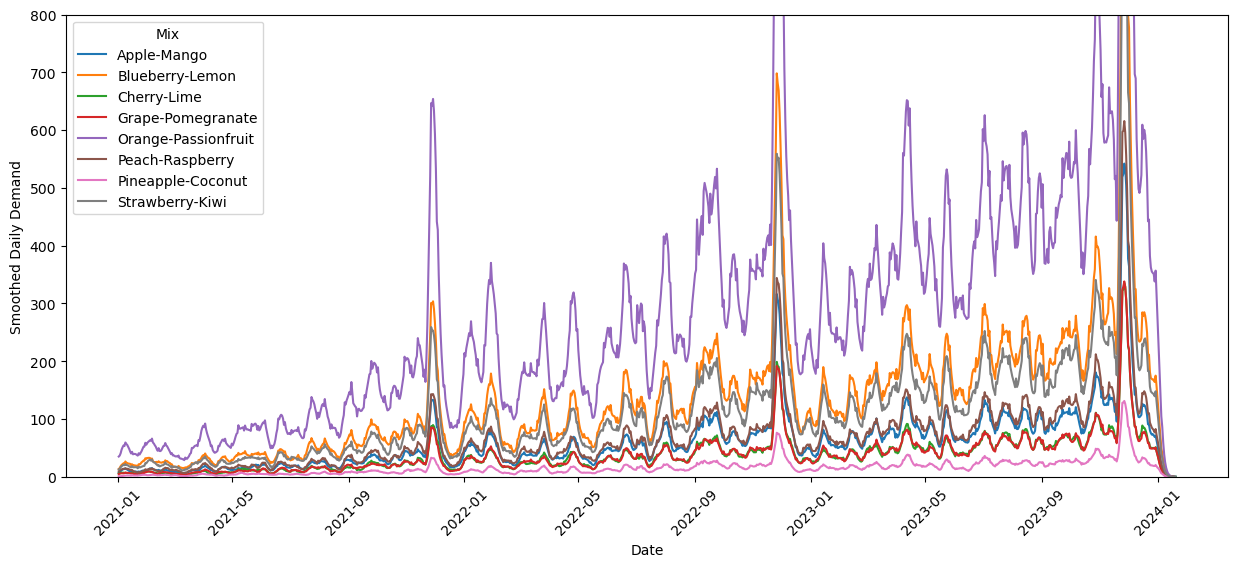

In [ ]:
# Group by Mix and plot the smoothed daily demand over time
plt.figure(figsize=(15, 6))
for mix, group in final_smoothed_demand_history.groupby('Mix'):
    plt.plot(group['Date'], group['Smoothed Rolling Demand'], label=mix)

plt.xlabel('Date')
plt.ylabel('Smoothed Daily Demand')
plt.legend(title='Mix', loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 800)

# Display the plot
plt.show()

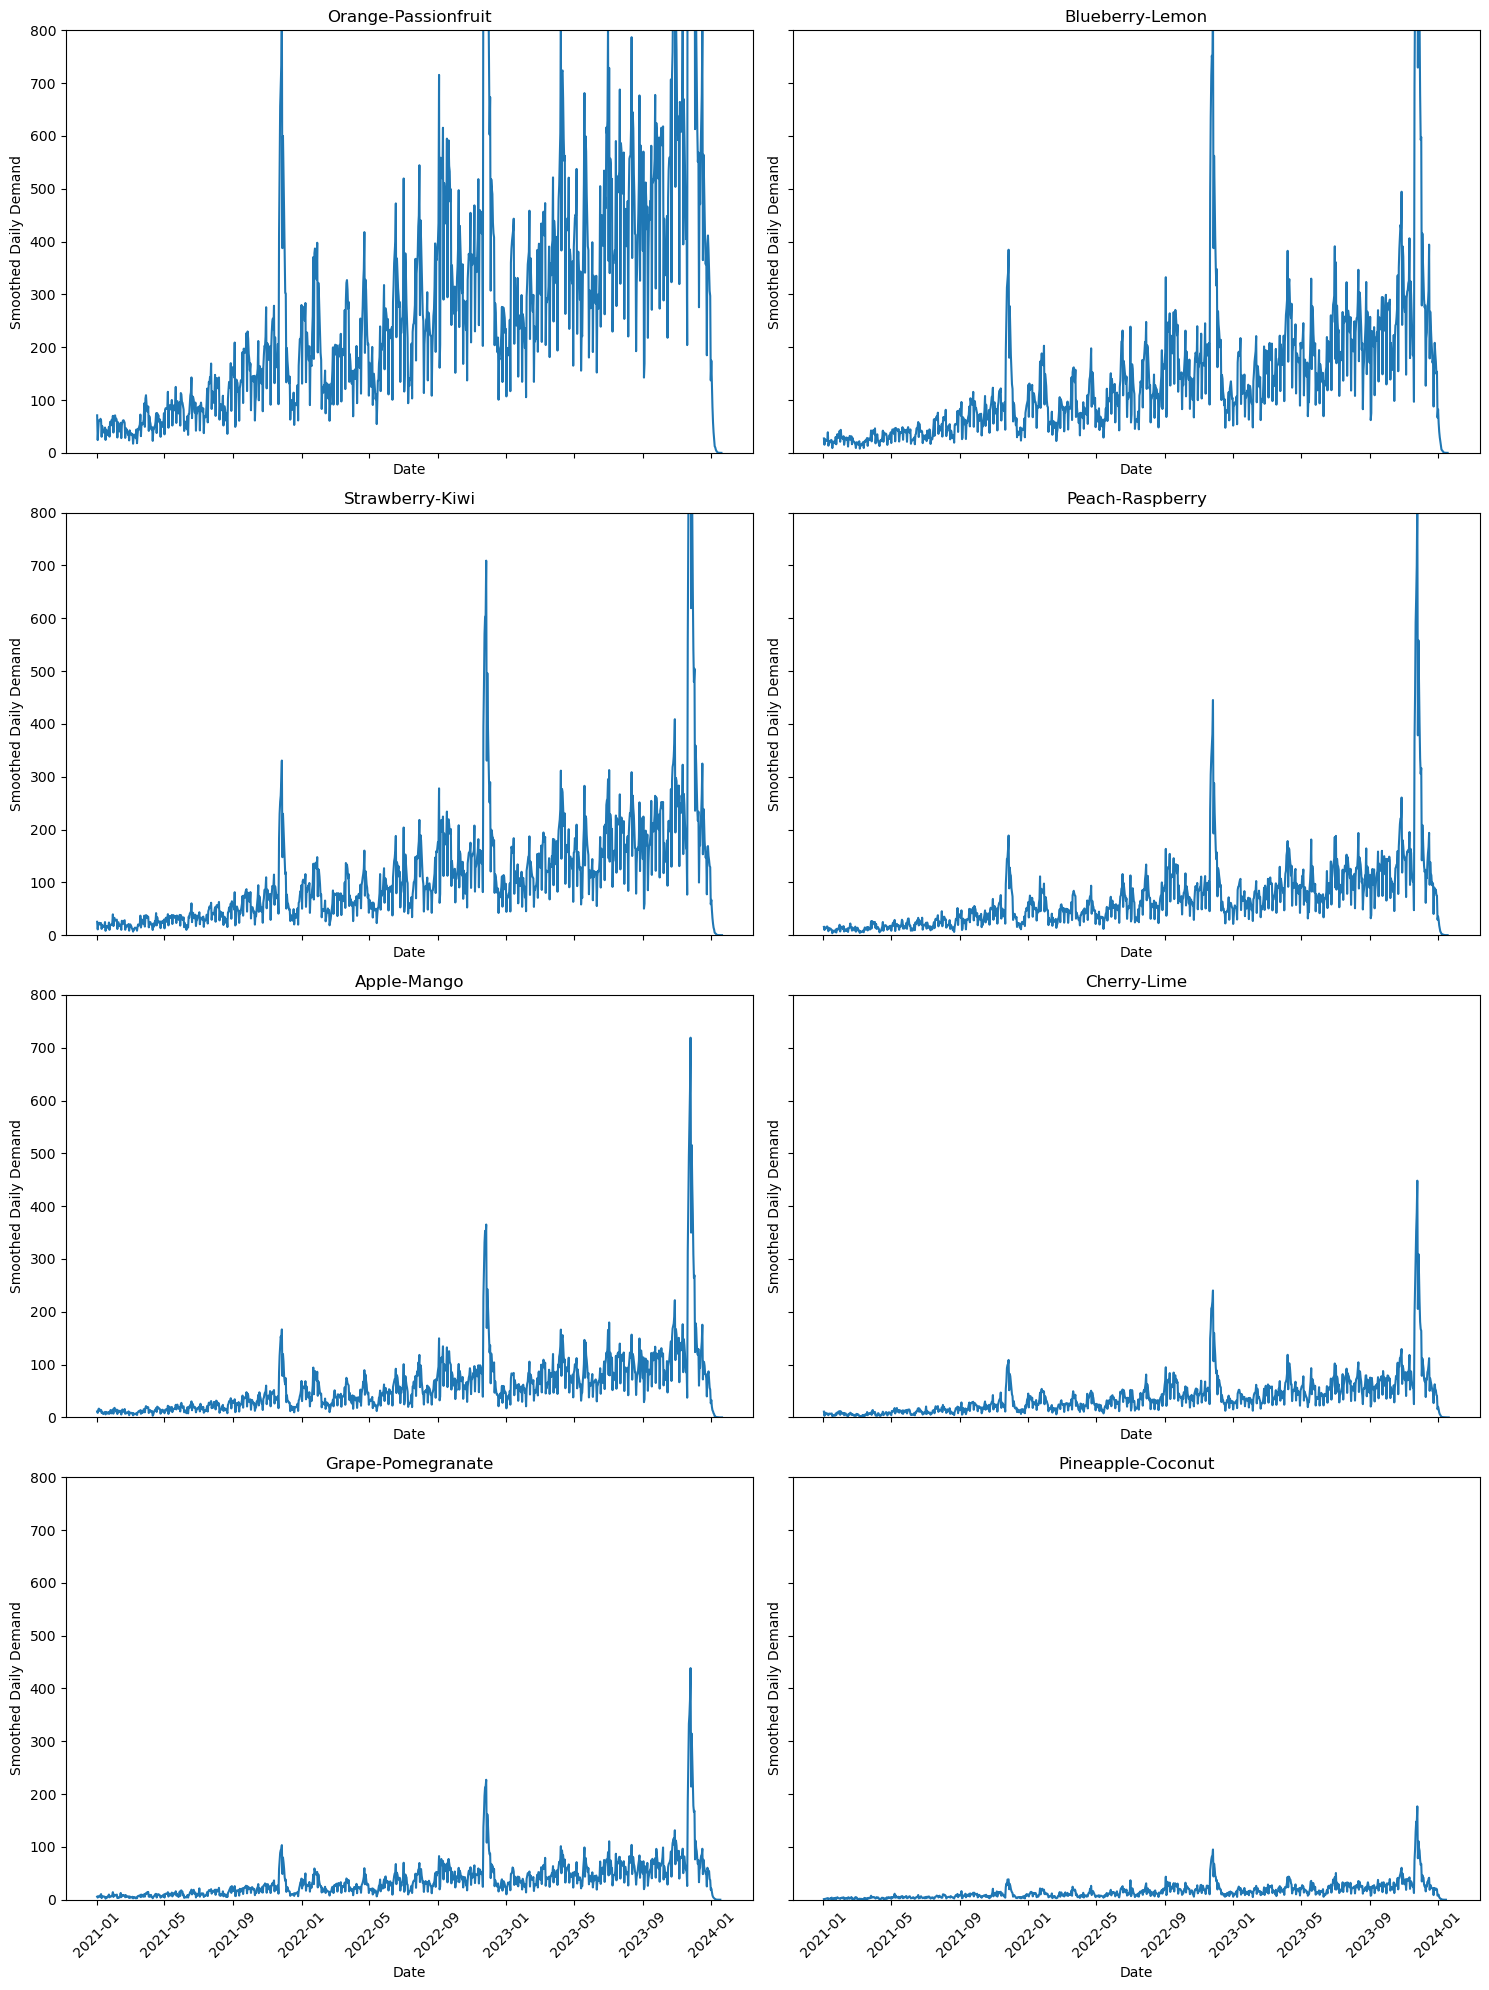

In [ ]:
# Get the top 8 mixes by total smoothed daily demand
smoothed_8_mixes = final_smoothed_demand_history.groupby('Mix')['Smoothed Daily Demand'].sum().nlargest(8).index

# Filter the dataframe for only the top 8 mixes
data = final_smoothed_demand_history[final_smoothed_demand_history['Mix'].isin(smoothed_8_mixes)]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each mix in a separate subplot
for i, mix in enumerate(smoothed_8_mixes):
    mix_data = data[data['Mix'] == mix]
    axes[i].plot(mix_data['Date'], mix_data['Smoothed Daily Demand'])
    axes[i].set_title(mix)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Smoothed Daily Demand')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 800)  # Set y-axis range

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df = preferred_shipping_demand_history.groupby('Preferred Shipping Date').agg({'Quantity': 'sum'}).reset_index()
df

NameError: name 'preferred_shipping_demand_history' is not defined

<Figure size 1200x800 with 0 Axes>

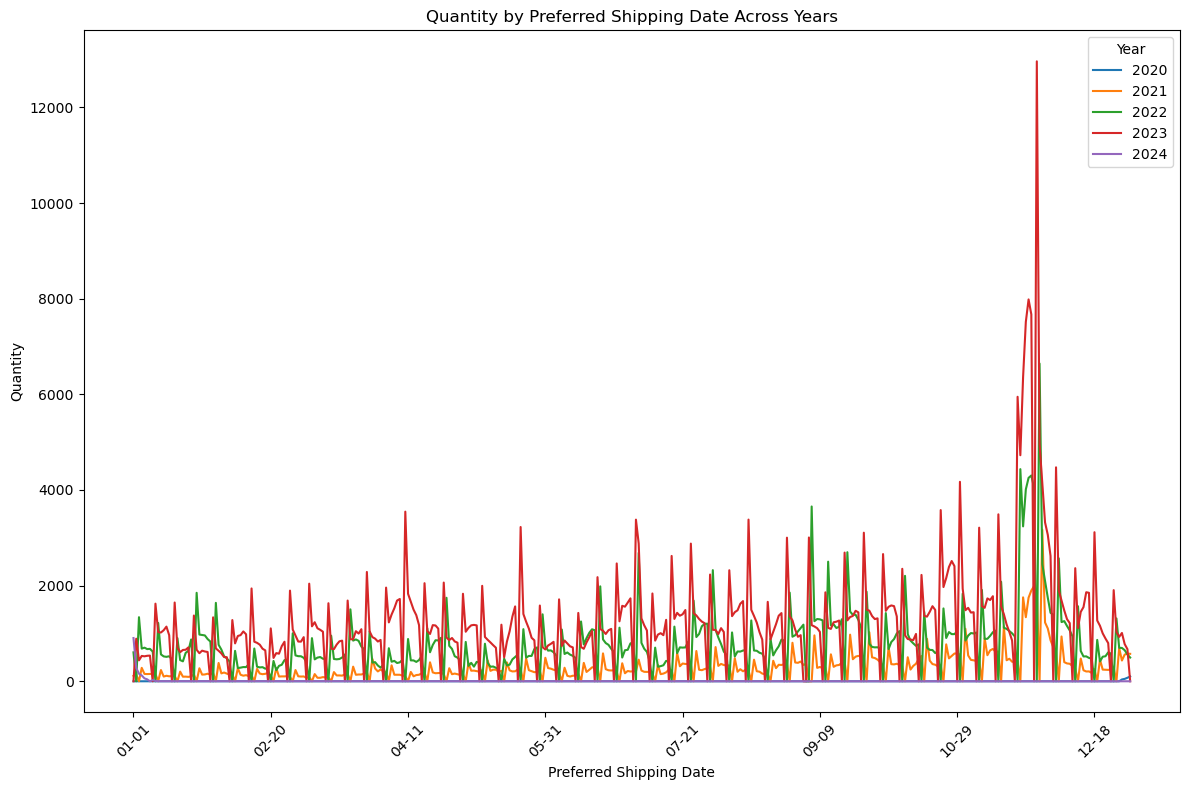

In [ ]:
# Note what year each preferred shipping date is in.
df['Preferred Shipping Date'] = pd.to_datetime(df['Preferred Shipping Date'])
df['Year'] = df['Preferred Shipping Date'].dt.year

df['Preferred Shipping Date Formatted'] = df['Preferred Shipping Date'].dt.strftime('%m-%d')

pivot_df = df.pivot(index='Preferred Shipping Date Formatted', columns='Year', values='Quantity').fillna(0)

plt.figure(figsize=(12, 8))
pivot_df.plot(kind='line', figsize=(12, 8))

plt.xlabel('Preferred Shipping Date')
plt.ylabel('Quantity')
plt.title('Quantity by Preferred Shipping Date Across Years')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

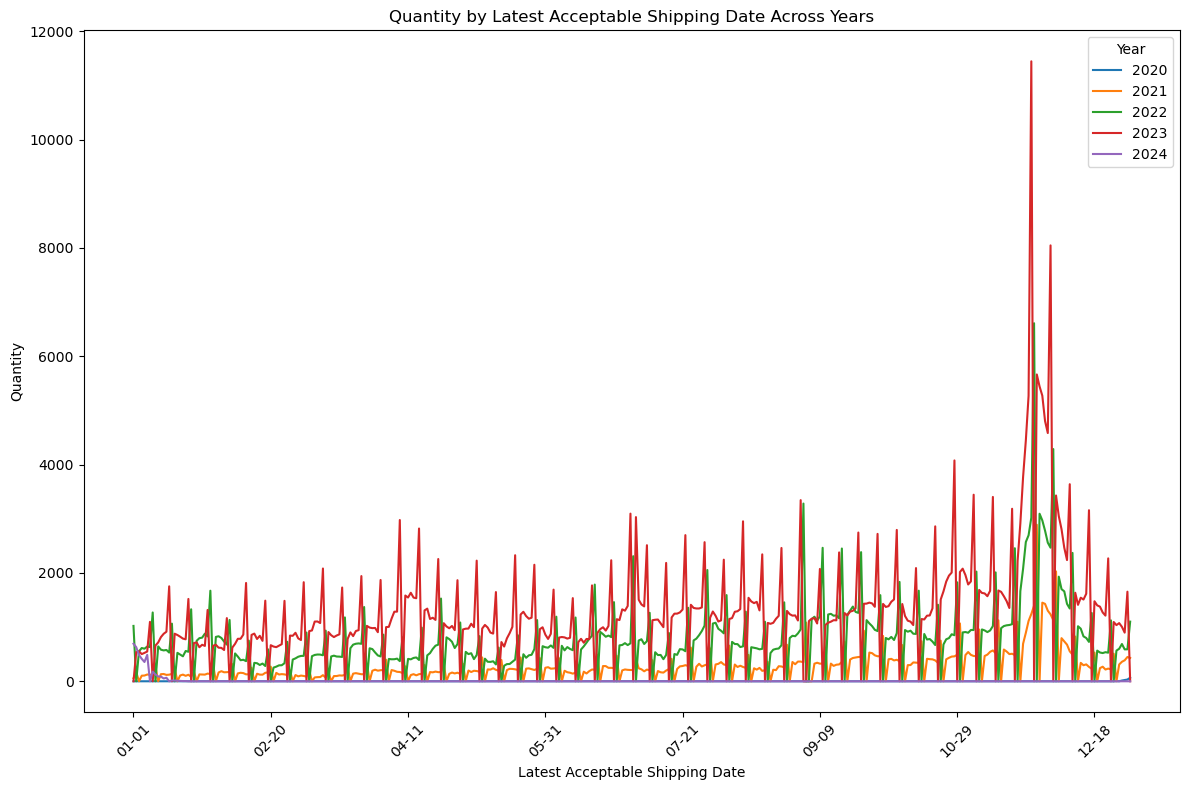

In [ ]:
df = latest_shipping_demand_history.groupby('Latest Acceptable Shipping Date').agg({'Quantity': 'sum'}).reset_index()

# Note what year each latest acceptable shipping date is in.
df['Latest Acceptable Shipping Date'] = pd.to_datetime(df['Latest Acceptable Shipping Date'])
df['Year'] = df['Latest Acceptable Shipping Date'].dt.year

df['Latest Acceptable Shipping Date Formatted'] = df['Latest Acceptable Shipping Date'].dt.strftime('%m-%d')

pivot_df = df.pivot(index='Latest Acceptable Shipping Date Formatted', columns='Year', values='Quantity').fillna(0)

plt.figure(figsize=(12, 8))
pivot_df.plot(kind='line', figsize=(12, 8))

plt.xlabel('Latest Acceptable Shipping Date')
plt.ylabel('Quantity')
plt.title('Quantity by Latest Acceptable Shipping Date Across Years')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

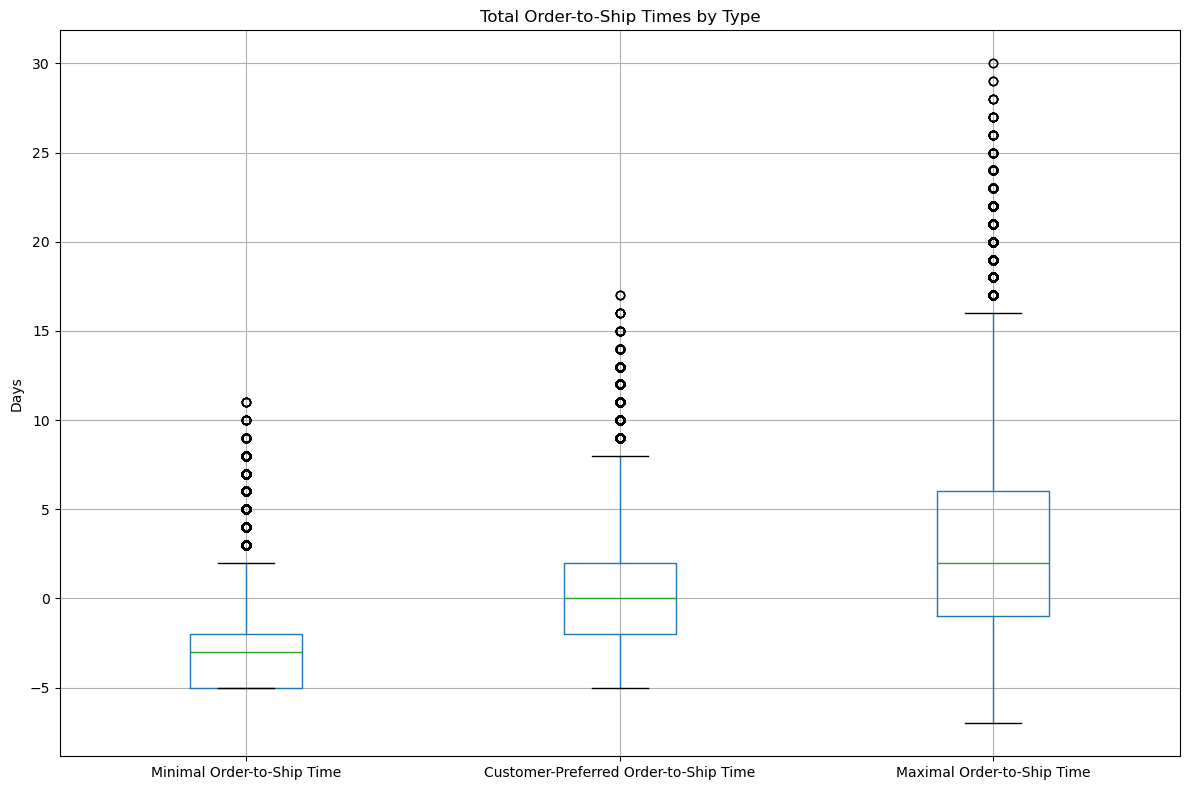

In [ ]:
# Creating a boxplot for each of the specified columns in df_demand_log
plt.figure(figsize=(12, 8))

# Plot a box and whisker plot for each of the specified columns
df_demand_log.boxplot(column=['Minimal Order-to-Ship Time', 'Customer-Preferred Order-to-Ship Time', 'Maximal Order-to-Ship Time'])

plt.title('Total Order-to-Ship Times by Type')
#plt.xlabel('Order-to-Ship Time Type')
plt.ylabel('Days')
plt.tight_layout()
plt.show()

<Figure size 1500x900 with 0 Axes>

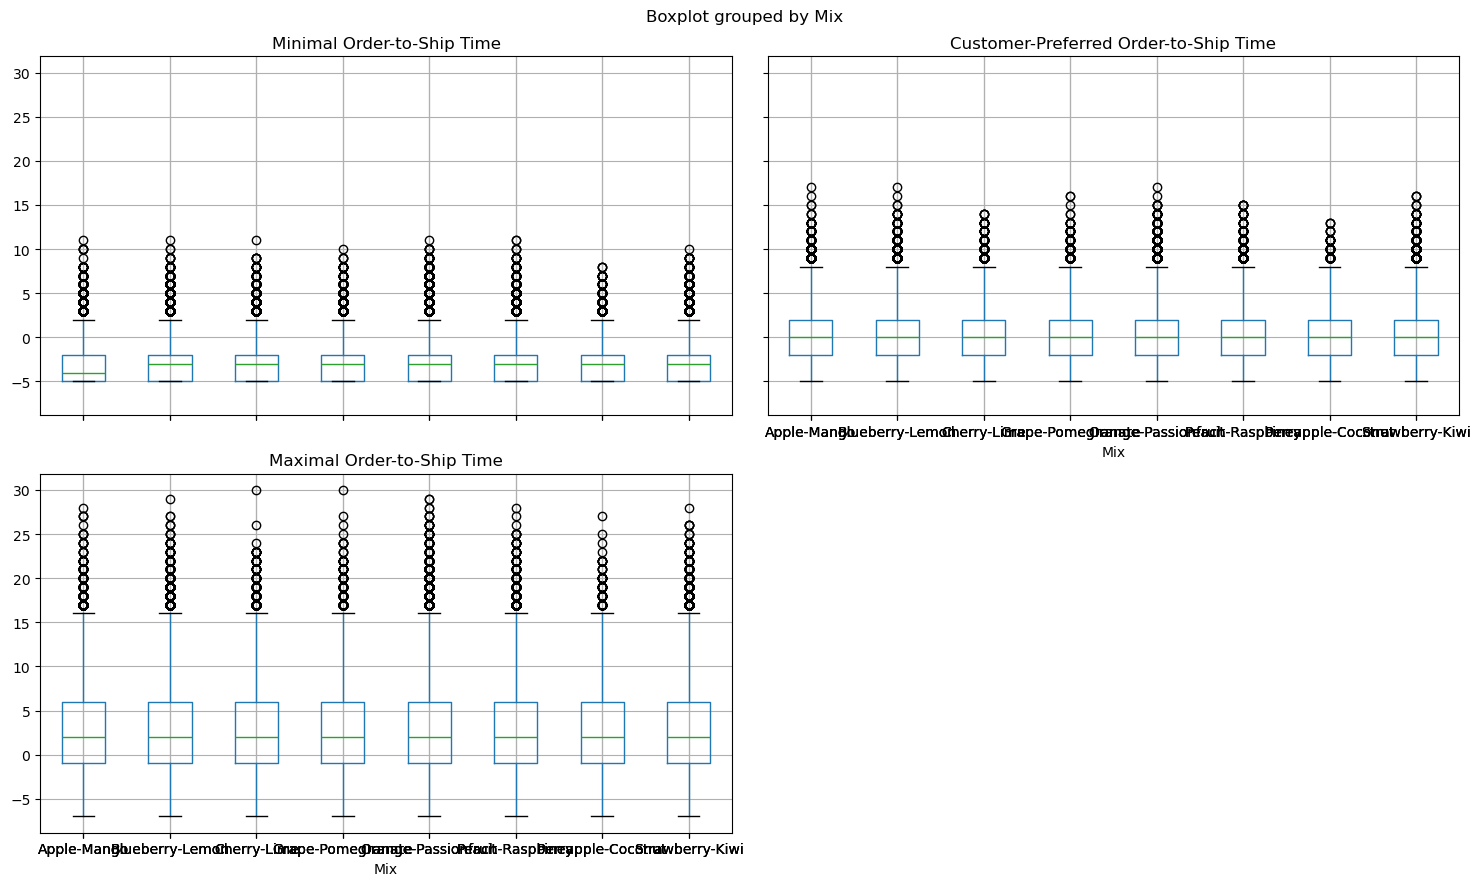

In [ ]:

# Creating a boxplot for each Mix across the three specified columns
columns = ['Minimal Order-to-Ship Time', 'Customer-Preferred Order-to-Ship Time', 'Maximal Order-to-Ship Time']

plt.figure(figsize=(15, 9))

# Plot a box and whisker plot for each mix and each of the specified columns
df_demand_log.boxplot(column=columns, by='Mix', figsize=(15, 9))

plt.title(' Order-to-Ship Times by Mix')
plt.ylabel('Order-to-Ship Time')
plt.xlabel('Mix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

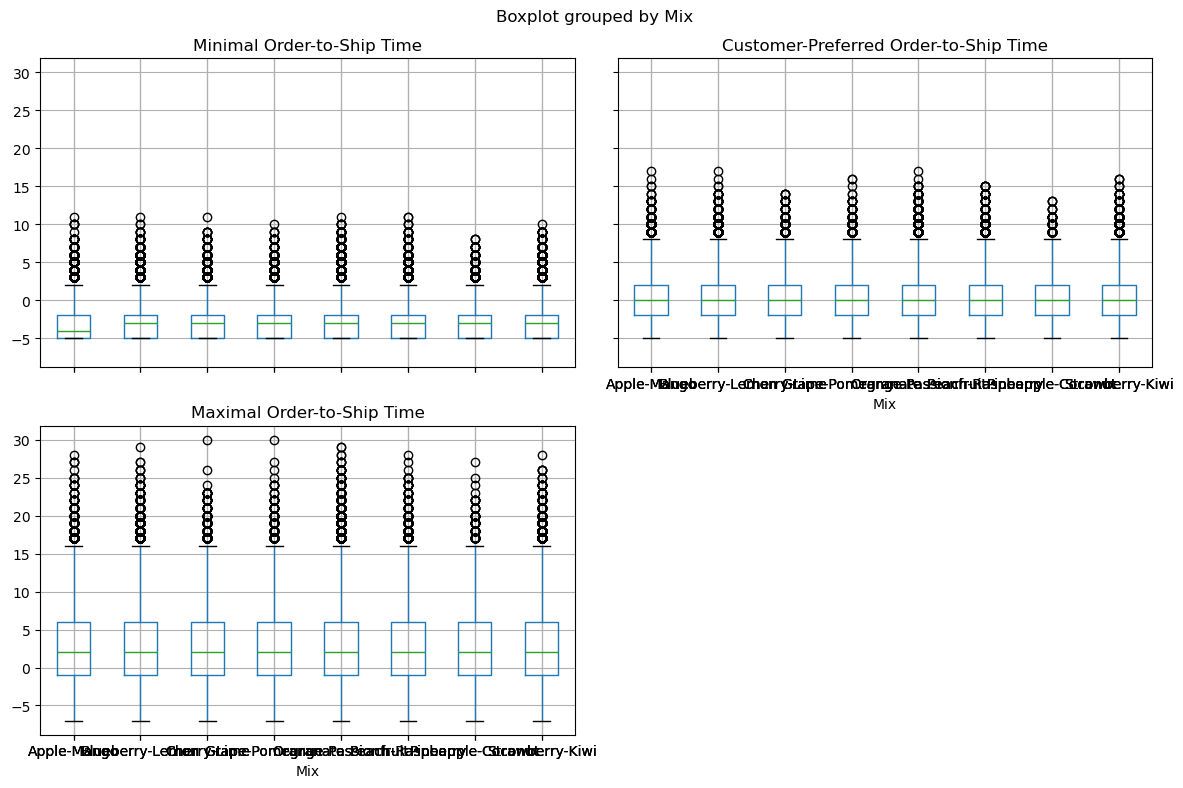

In [ ]:

# Creating a boxplot for each Mix across the three specified columns
columns = ['Minimal Order-to-Ship Time', 'Customer-Preferred Order-to-Ship Time', 'Maximal Order-to-Ship Time']

plt.figure(figsize=(12, 8))

# Plot a box and whisker plot for each mix and each of the specified columns
df_demand_log.boxplot(column=columns, by='Mix', figsize=(12, 8))

plt.title(' Order-to-Ship Times by Mix')

plt.ylabel('Order-to-Ship Time')
plt.xlabel('Mix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After evaluating the demand of different product mixes a few things stand out:
First, the demand cycles do not appear consistent on a yearly basis, aside from a reliable spike in early December. The second is the demand for each product mix has grown since 2021, and with this increase in volume of demand comes an increase in the volatility of demand. Third, ship estimates are similar across all products, it does not appear certain product mixes follow different shipping patterns/timelines.